In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as I

# Time evolution of the density matrix during the pump

We analyze the time evolution of both $\rho_{cvk}$ and $\rho_{cc'k}$ when the  pump is active.

To perform this analysis we consider a sinusoidal pump $Esin(\omega_0 t)$ activated at $t=0$.

## Analysis of $\rho_{cvk}$ at one-photon level

We study the DM in the valence-conduction sector at the leading order in the pump.

The EQM at one photon level reads
$$
\partial_{t}\rho_{cvk} + i\Omega_{cvk}\rho_{cvk} = F^0_{cvk}(t)
$$
where
$$
F^0_{cvk}(t) = id_{cvk}E sin(\omega_0t) = iA_{cvk}sin(\omega_0t)
$$
Here $\Omega_{cvk} = \Delta\epsilon_{cvk} - i\eta_{cv}$ and we parametrize the energy difference
between valence and conduction states as 
$$
\Delta\epsilon_{cvk} = \omega_0+\delta_{cvk}
$$
The EQM admits the solution (with initial condition $\rho_{cvk}(0) = 0$) of the form
$$
\rho_l(t) = iA_le^{-i\Omega_lt}\int_0^t dt'
e^{i\Omega_lt'}sin(\omega_0t')
$$
where $l=\{cvk\}$ is a compact multi index notation.

The integral can be computed both analtycal and with numerical integration, we perform both the analysis.

### Analytical solution

The integrand can be recasted as
$$
\frac{1}{2i}\left(
e^{i(2\omega_0+\delta_l)t'}-e^{i\delta_lt'}
\right)e^{\eta_{cv}t'}
$$
The first addend is a _fast oscillating term_ and its contribution should be small after the time integral so we 
neglect it. The integral of the second one provides
$$
-\frac{1}{2i}\frac{1}{i\delta_l+\eta_cv}\left(
e^{(i\delta_l+\eta_{cv})t} -1
\right)
$$
So the solution for the DM reads
$$
\rho_l(t) = -\frac{A_l}{2}\frac{1}{i\delta_l+\eta_{cv}}
\left(e^{-i\omega_0 t} -e^{-i\Omega_lt}
\right)
$$
In this analysis we consider a very small damping parameter $\eta_{cv}$, this choice is related to the fact
that we want to investigate the time evolution during the pump. In the limit $\eta_{cv} \rightarrow 0$ the
$\rho_l$ can be expressed as
$$
\rho_l(t) = -\frac{A_l}{2}\times \left\{
\begin{array}{c} 
\frac{e^{-i\omega_0t}}{i\delta_l}\left(1 - e^{-i\delta_lt}\right) \, ,
\quad \delta_l \neq 0 \\
e^{-i\omega_0t} t \, , \quad \delta_l = 0
\end{array}
\right.
$$

In [2]:
from mppi import Utilities as U

eta_ev = 2e-5 # damping parameter in eV
e0 = 1.5 # pump energy in eV
delta_ev = 0. #0.001 # detuning of the cv transition 
A = 1 # field intensity times the transition dipole

# we convert these parameters in fs
hcut = U.Planck_ev_ps*1e3/(2*np.pi) # reduced Planck ev * fs

eta = eta_ev/hcut
omega0 = e0/hcut
delta = delta_ev/hcut

print('omega0 in fsm1',omega0)
print('delta in fsm1',delta)
print('eta in fsm1',eta)
print('Period of the pump in fs',(2*np.pi)/omega0)
print('Tau of the damping in ps',1e-3/eta)

omega0 in fsm1 2.2789011723270187
delta in fsm1 0.0
eta in fsm1 3.038534896436025e-05
Period of the pump in fs 2.7571117973333332
Tau of the damping in ps 32.91059784019349


In [26]:
sim_time = 15e3 # in fs,
time = np.arange(0.,sim_time,0.5)

In [27]:
def rhocv(t,omega0,A=1,delta=0,eta=1e-3):
    f1 = - A/2*1/(1j*delta+eta)
    f2 = np.exp(-1j*omega0*t) - np.exp(-1j*(omega0+delta)*t)*np.exp(-eta*t)
    res = f1*f2
    return np.real(res),np.imag(res)

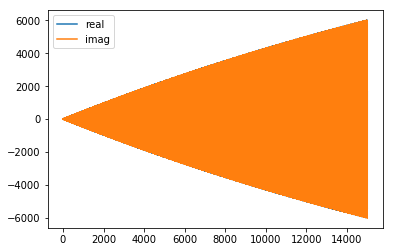

In [28]:
rho_val = rhocv(time,omega0,eta=eta,delta=delta)
plt.plot(time,rho_val[0],label='real')
plt.plot(time,rho_val[1],label='imag')
plt.legend()

### Numerical solution

In [29]:
def integrand(t,omega0,delta=0,eta=0):
    re = np.exp(eta*t)*np.cos((omega0+delta)*t)*np.sin(omega0*t)
    im = np.exp(eta*t)*np.sin((omega0+delta)*t)*np.sin(omega0*t)
    return re,im

def integral(time,omega0,delta=0,eta=0):
    re_inte = [0.]
    im_inte = [0.]
    for ind in range(1,len(time)):
        re_inte.append(I.simps(y=integrand(time[0:ind],omega0,delta=delta,eta=eta)[0],x=time[0:ind]))
        im_inte.append(I.simps(y=integrand(time[0:ind],omega0,delta=delta,eta=eta)[1],x=time[0:ind]))
    inte = np.array(re_inte)+1j*np.array(im_inte)
    return inte

def rhocv_numerical(time,omega0,A=1,delta=0,eta=0):
    inte = integral(time,omega0,delta=delta,eta=eta)
    prefactor = 1j*A*np.exp((-1j*(omega0+delta)-eta)*time)
    res = prefactor*inte
    return np.real(res),np.imag(res)

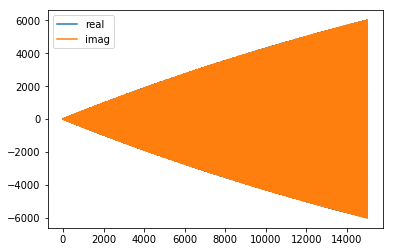

In [30]:
rhoval_num = rhocv_numerical(time,omega0,eta=eta,delta=delta)
plt.plot(time,rhoval_num[0],label='real')
plt.plot(time,rhoval_num[1],label='imag')
plt.legend()

## Analysis of $\rho_{cc'k}$ at two-photon level

We analyze the equation of the $\rho_{cc'k}$ components at the second order in the pulse intensity. 

In particular we want to check if the source term can produce terms that couples
to the natural frequency $\Delta\epsilon_{cc'k}$ of these modes.

The EQM for $\rho_{cc'k}$ can be rewritten as
$$
\partial_{t}\rho_{cc'k} + i\Omega_{cc'k}\rho_{cc'k} = F^1_{cc'k}(t)
$$
where $\Omega_{cc'k} = \Delta\epsilon_{cc'k} - i\eta_{cc'}$ and the source term is given by
$$
F^1_{cc'k}(t) = -i\mathbf{E}(t)\cdot \sum_{v}\left(
\mathbf{d}_{cvk}\rho^{(0)}_{vc'k}(t)
-\mathbf{d}_{vc'k}\rho^{(0)}_{cvk}(t)\right)
$$

We further analyze the structure of the source by considering only one valence band and the 
sinusoidal pump, so that
$$
F^1_{cc'k}(t) = -i sin(\omega_0t)\left(A_{cvk}\rho^{(0)}_{vc'k}(t)
-A_{vc'k}\rho^{(0)}_{cvk}(t)\right)
$$
We consider the case in which the $cv$ transition is resonant with the pump so that $\delta_{cvk} = 0$ and
$\delta_{c'vk} = \delta_{cc'k}$. The associate one-photon DM read
$$
\rho_{cvk} = - \frac{A_{cvk}}{2}e^{-i\omega_0t}t \, , \\
\rho_{vc'k} = \rho_{c'vk}^* = \frac{A_{c'vk}^*}{2}
\frac{e^{i\omega_0t}}{i\delta_{cc'k}}\left(1 - e^{i\delta_{cc'k}t}\right)
$$
And the source term read
$$
F^1_{cc'k}(t) = -i sin(\omega_0t)\frac{A_{cvk}A^*_{c'vk}}{2}
\left[
\frac{e^{i\omega_0t}}{i\delta_{cc'k}}\left(1 - e^{i\delta_{cc'k}t}\right) +
e^{-i\omega_0t}t
\right]
$$
when we expand the sine we neglect the fast oscillating terms so that
$$
F^1_{cc'k}(t) = -\frac{A_{cvk}A^*_{c'vk}}{4}
\left[ t -
\frac{1}{i\delta_{cc'k}}\left(1 - e^{i\delta_{cc'k}t}\right)
\right]
$$

__COMMENT : from this analysis we cannot explain the dipendence of the frequency of the spin polarization
on the intensity of the field__

In [83]:
deltacpc = 0.001 # eV
Acv = 1.
Acpv = 1.

time_numerical = np.arange(0.,sim_time,2)

In [85]:
def F1(time,deltacpc,Acv=1,Acpv=1):
    f1 = - Acv*Acpv/4.
    f2 = time - 1/(1j*deltacpc)*(1-np.exp(1j*deltacpc*time))
    res = f1*f2
    return np.real(res),np.imag(res)

In [88]:
F1_theo = F1(time_numerical,deltacpc)

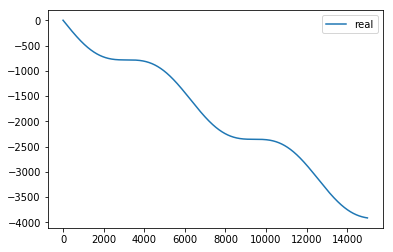

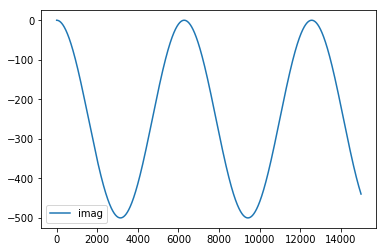

In [89]:
plt.plot(time_numerical,F1_theo[0],label='real')
plt.legend()
plt.show()
plt.plot(time_numerical,F1_theo[1],label='imag')
plt.legend()

### Numerical analysis

We compute $F^1_{cc'k}$ using the formula written above and the analytical expression
of $\rho^{(0)}_{cvk}$.

In [91]:
def F1_numerical(time,omega0,deltacpc,Acv=1,Acpv=1,eta=1e-3):
    rcv = rhocv(time,omega0,A=Acv,delta=0,eta=eta)
    rcpv = rhocv(time,omega0,A=Acpv,delta=deltacpc,eta=eta)
    rcv_complex = rcv[0]+1j*rcv[1]
    rvcp_complex = rcpv[0]-1j*rcpv[1]
    f1 = -1j*np.sin(omega0*time)
    f2 = (Acv*rvcp_complex-np.conj(Acpv)*rcv_complex)
    res = f1*f2
    return np.real(res),np.imag(res)

In [92]:
deltacpc = 0.001 # eV
Acv = 1.
Acpv = 1.

time_numerical = np.arange(0.,sim_time,2)

In [93]:
F1_val = F1_numerical(time_numerical,omega0,deltacpc,Acv=Acv,Acpv=Acpv,eta=eta)

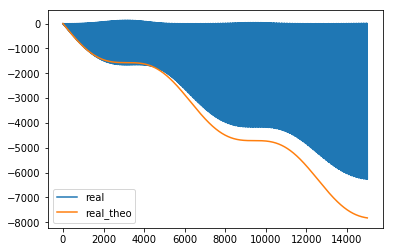

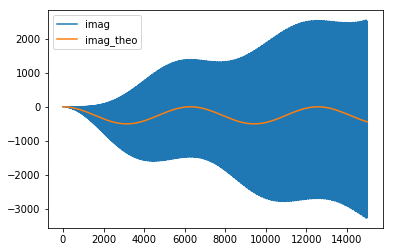

In [103]:
plt.plot(time_numerical,F1_val[0],label='real')
plt.plot(time_numerical,2*F1_theo[0],label='real_theo')
plt.legend()
plt.show()
plt.plot(time_numerical,F1_val[1],label='imag')
plt.plot(time_numerical,F1_theo[1],label='imag_theo')
plt.legend()

We can integrate the EOM for $\rho^{(1)}_{cc'k}$ using this expression as the source term.

The solution can be recasted as
$$
\rho_{cc'k}^{(1)}(t) = e^{-i\Omega_{cc'k}t}\int_0^t dt'
e^{i\Omega_{cc'k}t'}F^{(1)}_{cc'k}
$$

In [74]:
def rho1_integrand(t,omega0,deltacpc,Acv=1,Acpv=1,eta=1e-3):
    F1_val = F1_numerical(t,omega0,deltacpc,Acv=Acv,Acpv=Acpv,eta=eta)
    re = np.exp(eta*t)*(np.cos((omega0+deltacpc)*t)*F1_val[0]-np.sin((omega0+deltacpc)*t)*F1_val[1])
    im = np.exp(eta*t)*(np.sin((omega0+deltacpc)*t)*F1_val[0]+np.cos((omega0+deltacpc)*t)*F1_val[0])
    return re,im

def rho1_integral(time,omega0,deltacpc=0,Acv=1,Acpv=1,eta=1e-3):
    re_inte = [0.]
    im_inte = [0.]
    for ind in range(1,len(time)):
        ii = rho1_integrand(time[0:ind],omega0,deltacpc=deltacpc,Acv=Acv,Acpv=Acpv,eta=eta)
        re_inte.append(I.simps(y=ii[0],x=time[0:ind]))
        im_inte.append(I.simps(y=ii[1],x=time[0:ind]))
    inte = np.array(re_inte)+1j*np.array(im_inte)
    return inte

def rho1ccp(time,omega0,deltacpc=0,Acv=1,Acpv=1,eta=1e-3):
    inte = rho1_integral(time,omega0,deltacpc=deltacpc,Acv=Acv,Acpv=Acpv,eta=eta)
    prefactor = np.exp((-1j*(omega0+deltacpc)-eta)*time)
    res = prefactor*inte
    return np.real(res),np.imag(res)

In [75]:
rho1_val = rho1ccp(time_numerical,omega0,deltacpc,Acv=Acv,Acpv=Acpv,eta=eta)
rho1_val_highfield = rho1ccp(time_numerical,omega0,deltacpc,Acv=10,Acpv=10,eta=eta)

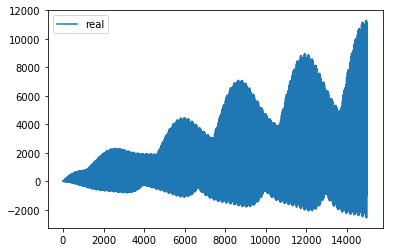

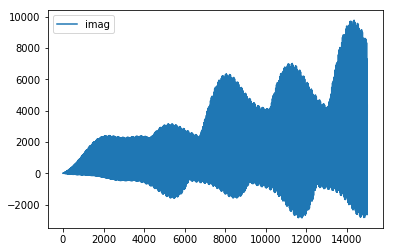

In [76]:
plt.plot(time_numerical,rho1_val[0],label='real')
plt.legend()
plt.show()
plt.plot(time_numerical,rho1_val[1],label='imag')
plt.legend()

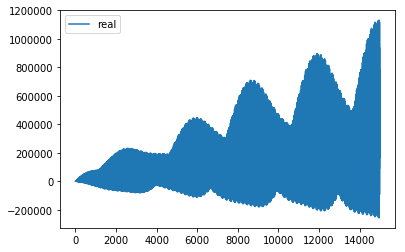

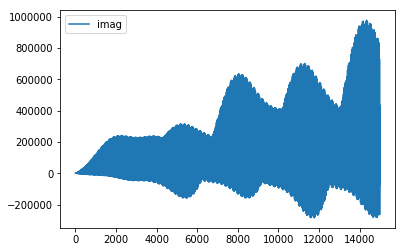

In [77]:
plt.plot(time_numerical,rho1_val_highfield[0],label='real')
plt.legend()
plt.show()
plt.plot(time_numerical,rho1_val_highfield[1],label='imag')
plt.legend()